# Loading some libraries

In [1]:
import pandas as pd
import numpy as np

# Loading Data

In [2]:
df_goemotion_ekman = pd.read_csv(r'C:\Users\akifk\Data Science Research Project B\Data\reddit_beyondblue_combined\reddit_beyondblue_combined_goEmotion_ekman.csv')

df_goemotion_ekman.head()

,content,ekman_emotions,emotions,emotion_probs,p_admiration,p_amusement,p_anger,p_annoyance,p_approval,p_caring,...,p_love,p_nervousness,p_optimism,p_pride,p_realization,p_relief,p_remorse,p_sadness,p_surprise,p_neutral
0,"not a medical professional here, but OD’s are ...",['joy'],['caring'],[0.9137601852416992],0.031129,0.002553,0.004117,0.007689,0.140474,0.913760,...,0.035620,0.004811,0.150350,0.001879,0.007593,0.008546,0.006648,0.008395,0.000983,0.043379
1,I was hospitalized about a dozen times from DX...,['joy'],['caring'],[0.888289213180542],0.020284,0.001275,0.004293,0.007458,0.121483,0.888289,...,0.192794,0.004332,0.061035,0.001807,0.006536,0.008767,0.007225,0.011715,0.000624,0.076625
2,"How do I know if I'm overdosing? I'm sorry, I...",['sadness'],['remorse'],[0.7335519790649414],0.003771,0.003731,0.004624,0.010463,0.016137,0.021090,...,0.008106,0.012870,0.007934,0.000433,0.015338,0.001873,0.733552,0.330212,0.003116,0.023700
3,"I'm sorry I shouldn't have asked that, I'll st...",['sadness'],['remorse'],[0.7935513854026794],0.002313,0.005273,0.021682,0.036511,0.020029,0.036370,...,0.003269,0.003623,0.018677,0.000936,0.017112,0.002486,0.793551,0.184039,0.000717,0.015916
4,"You’re not harassing me, you just need help. W...",['joy'],['caring'],[0.9169411659240723],0.025081,0.001426,0.006950,0.013462,0.079712,0.916941,...,0.019579,0.005538,0.076351,0.001817,0.005540,0.007590,0.008343,0.011896,0.000757,0.041328


In [3]:
print(df_goemotion_ekman['ekman_emotions'].value_counts())
print(df_goemotion_ekman['ekman_emotions'].unique())

ekman_emotions
['neutral']            40630
['joy']                37507
['surprise']            7564
['sadness']             6220
['fear']                2914
['disgust']             2310
['anger']                871
['joy', 'surprise']       70
['joy', 'sadness']        18
Name: count, dtype: int64
["['joy']" "['sadness']" "['neutral']" "['surprise']" "['fear']"
 "['disgust']" "['anger']" "['joy', 'sadness']" "['joy', 'surprise']"]


In [4]:
df_goemotion_ekman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98104 entries, 0 to 98103
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   content           98104 non-null  object 
 1   ekman_emotions    98104 non-null  object 
 2   emotions          98104 non-null  object 
 3   emotion_probs     98104 non-null  object 
 4   p_admiration      98104 non-null  float64
 5   p_amusement       98104 non-null  float64
 6   p_anger           98104 non-null  float64
 7   p_annoyance       98104 non-null  float64
 8   p_approval        98104 non-null  float64
 9   p_caring          98104 non-null  float64
 10  p_confusion       98104 non-null  float64
 11  p_curiosity       98104 non-null  float64
 12  p_desire          98104 non-null  float64
 13  p_disappointment  98104 non-null  float64
 14  p_disapproval     98104 non-null  float64
 15  p_disgust         98104 non-null  float64
 16  p_embarrassment   98104 non-null  float6

# Prepping for Single Label Classification

In [5]:
import ast

df = df_goemotion_ekman.copy()

# Convert string-list to real list
df['ekman_emotions'] = df['ekman_emotions'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

# Extract first emotion
df['label'] = df['ekman_emotions'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None)

# Remove rows with missing label (should be very few)
df = df.dropna(subset=['label']).reset_index(drop=True)

print(df[['content','ekman_emotions','label']].head())
print(df['label'].value_counts())


                                             content ekman_emotions    label
0  not a medical professional here, but OD’s are ...          [joy]      joy
1  I was hospitalized about a dozen times from DX...          [joy]      joy
2  How do I know if  I'm overdosing? I'm sorry, I...      [sadness]  sadness
3  I'm sorry I shouldn't have asked that, I'll st...      [sadness]  sadness
4  You’re not harassing me, you just need help. W...          [joy]      joy
label
neutral     40630
joy         37595
surprise     7564
sadness      6220
fear         2914
disgust      2310
anger         871
Name: count, dtype: int64


# Distil Bert Data Prep

In [6]:
import pandas as pd
import numpy as np
import ast
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

df = df_goemotion_ekman.copy()

# Convert Ekman emotion strings → real lists
df['ekman_emotions'] = df['ekman_emotions'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

# Extract single dominant label
df['label'] = df['ekman_emotions'].apply(lambda x: x[0] if len(x) > 0 else None)

# Remove missing labels
df = df.dropna(subset=['label']).reset_index(drop=True)

print(df['label'].value_counts())
print("Labels ready!")

# Encode labels
label_encoder = LabelEncoder()
df['label_id'] = label_encoder.fit_transform(df['label'])

classes = label_encoder.classes_
num_labels = len(classes)

print("Label mapping:")
print(dict(zip(classes, range(num_labels))))

# Global function to compute evaluation metrics
def get_metrics(true, pred, classes):
    return {
        "accuracy": accuracy_score(true, pred),
        "precision_macro": precision_score(true, pred, average="macro", zero_division=0),
        "recall_macro": recall_score(true, pred, average="macro", zero_division=0),
        "f1_macro": f1_score(true, pred, average="macro", zero_division=0),
        "precision_weighted": precision_score(true, pred, average="weighted", zero_division=0),
        "recall_weighted": recall_score(true, pred, average="weighted", zero_division=0),
        "f1_weighted": f1_score(true, pred, average="weighted", zero_division=0),
        "report": classification_report(true, pred, target_names=classes)
    }


label
neutral     40630
joy         37595
surprise     7564
sadness      6220
fear         2914
disgust      2310
anger         871
Name: count, dtype: int64
Labels ready!
Label mapping:
{'anger': 0, 'disgust': 1, 'fear': 2, 'joy': 3, 'neutral': 4, 'sadness': 5, 'surprise': 6}


# Distil Bert (Full Balanced DataSet)

In [7]:
!pip install transformers --quiet

import torch
from torch.optim import AdamW
from torch.utils.data import Dataset, DataLoader
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification

# FULL BALANCE: smallest class = anchor
target_size = df['label_id'].value_counts().min()

balanced_frames = []
for label_id in df['label_id'].unique():
    subset = df[df['label_id'] == label_id]
    balanced = subset.sample(target_size, replace=True, random_state=42)
    balanced_frames.append(balanced)

df_balanced_full = pd.concat(balanced_frames).reset_index(drop=True)

train_df, test_df = train_test_split(
    df_balanced_full, test_size=0.2, stratify=df_balanced_full['label_id'], random_state=42
)

train_df, val_df = train_test_split(
    train_df, test_size=0.1, stratify=train_df['label_id'], random_state=42
)

tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")

class EmotionDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts.tolist()
        self.labels = labels.tolist()

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        encoding = tokenizer(
            self.texts[idx], truncation=True, padding="max_length",
            max_length=128, return_tensors='pt'
        )
        item = {k: v.squeeze(0) for k, v in encoding.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)
        return item

train_ds = EmotionDataset(train_df['content'], train_df['label_id'])
val_ds   = EmotionDataset(val_df['content'], val_df['label_id'])
test_ds  = EmotionDataset(test_df['content'], test_df['label_id'])

train_loader = DataLoader(train_ds, batch_size=8, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=8)
test_loader  = DataLoader(test_ds, batch_size=8)

device = torch.device("cpu")

model = DistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased", num_labels=num_labels
).to(device)

optimizer = AdamW(model.parameters(), lr=2e-5)

# TRAINING LOOP
for epoch in range(3):
    model.train()
    total_loss = 0
    for batch in train_loader:
        batch = {k:v.to(device) for k,v in batch.items()}
        outputs = model(**batch)
        loss = outputs.loss

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        total_loss += loss.item()

    print(f"Epoch {epoch+1} - Train Loss: {total_loss:.4f}")

# EVALUATION
model.eval()
preds, true = [], []

with torch.no_grad():
    for batch in test_loader:
        batch = {k:v.to(device) for k,v in batch.items()}
        outputs = model(**batch)
        logits = outputs.logits
        pred = logits.argmax(dim=1).cpu().numpy()

        preds.extend(pred)
        true.extend(batch['labels'].cpu().numpy())

metrics_full = get_metrics(true, preds, classes)
print(metrics_full["report"])


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

c:\Users\akifk\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\akifk\.cache\huggingface\hub\models--distilbert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1 - Train Loss: 438.0161
Epoch 2 - Train Loss: 91.8991
Epoch 3 - Train Loss: 38.8714
              precision    recall  f1-score   support

       anger       0.96      0.99      0.98       174
     disgust       0.97      0.91      0.94       174
        fear       0.99      0.98      0.99       174
         joy       0.91      0.83      0.87       175
     neutral       0.87      0.84      0.86       174
     sadness       0.95      0.93      0.94       174
    surprise       0.82      0.97      0.89       175

    accuracy                           0.92      1220
   macro avg       0.92      0.92      0.92      1220
weighted avg       0.92      0.92      0.92      1220



# Distil Bert (Soft Balanced Dataset)

In [11]:
from sklearn.utils import resample

# SOFT BALANCING TARGETS
soft_targets = {
    # IMPORTANT: label_id → target samples
    df[df['label']=="neutral"]['label_id'].iloc[0]: 20000,
    df[df['label']=="joy"]['label_id'].iloc[0]:     20000,
    df[df['label']=="surprise"]['label_id'].iloc[0]: 8000,
    df[df['label']=="sadness"]['label_id'].iloc[0]:  6000,
    df[df['label']=="fear"]['label_id'].iloc[0]:     4000,
    df[df['label']=="disgust"]['label_id'].iloc[0]:  4000,
    df[df['label']=="anger"]['label_id'].iloc[0]:    4000,
}

soft_frames = []
for lid, target in soft_targets.items():
    subset = df[df['label_id'] == lid]
    if len(subset) >= target:
        balanced = subset.sample(target, random_state=42)
    else:
        balanced = subset.sample(target, replace=True, random_state=42)
    soft_frames.append(balanced)

df_soft = pd.concat(soft_frames).reset_index(drop=True)

# TRAIN/VAL/TEST SPLIT
train_df, test_df = train_test_split(
    df_soft, test_size=0.2, stratify=df_soft['label_id'], random_state=42
)

train_df, val_df = train_test_split(
    train_df, test_size=0.1, stratify=train_df['label_id'], random_state=42
)

# DATASET + DATALOADER
train_ds = EmotionDataset(train_df['content'], train_df['label_id'])
val_ds   = EmotionDataset(val_df['content'], val_df['label_id'])
test_ds  = EmotionDataset(test_df['content'], test_df['label_id'])

train_loader = DataLoader(train_ds, batch_size=8, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=8)
test_loader  = DataLoader(test_ds, batch_size=8)

# MODEL
model_soft = DistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased", num_labels=num_labels
).to(device)

optimizer = AdamW(model_soft.parameters(), lr=2e-5)

# TRAINING (3 EPOCHS)
for epoch in range(3):
    model_soft.train()
    total_loss = 0
    for batch in train_loader:
        batch = {k:v.to(device) for k,v in batch.items()}
        outputs = model_soft(**batch)
        loss = outputs.loss

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        total_loss += loss.item()

    print(f"[Soft] Epoch {epoch+1} Loss: {total_loss:.4f}")

# EVALUATION
model_soft.eval()
preds, true = [], []

with torch.no_grad():
    for batch in test_loader:
        batch = {k:v.to(device) for k,v in batch.items()}
        logits = model_soft(**batch).logits
        pred = logits.argmax(dim=1).cpu().numpy()

        preds.extend(pred)
        true.extend(batch["labels"].cpu().numpy())

metrics_soft = get_metrics(true, preds, classes)
print("\n[Soft Balance] Classification Report:\n")
print(metrics_soft["report"])


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[Soft] Epoch 1 Loss: 1527.2717
[Soft] Epoch 2 Loss: 488.1711
[Soft] Epoch 3 Loss: 289.5432

[Soft Balance] Classification Report:

              precision    recall  f1-score   support

       anger       0.98      1.00      0.99       800
     disgust       0.98      0.97      0.97       800
        fear       0.98      0.99      0.99       800
         joy       0.96      0.96      0.96      4000
     neutral       0.96      0.97      0.97      4000
     sadness       0.98      0.93      0.95      1200
    surprise       0.96      0.97      0.97      1600

    accuracy                           0.97     13200
   macro avg       0.97      0.97      0.97     13200
weighted avg       0.97      0.97      0.97     13200



# Distil Bert (No balance, just class weights)

In [12]:
from sklearn.utils.class_weight import compute_class_weight
import torch.nn as nn

# Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(df['label_id']),
    y=df['label_id']
)

weights = torch.tensor(class_weights, dtype=torch.float).to(device)

loss_fn = nn.CrossEntropyLoss(weight=weights)

# Train/val/test split
train_df, test_df = train_test_split(
    df, test_size=0.2, stratify=df['label_id'], random_state=42
)
train_df, val_df = train_test_split(
    train_df, test_size=0.1, stratify=train_df['label_id'], random_state=42
)

train_ds = EmotionDataset(train_df['content'], train_df['label_id'])
val_ds   = EmotionDataset(val_df['content'], val_df['label_id'])
test_ds  = EmotionDataset(test_df['content'], test_df['label_id'])

train_loader = DataLoader(train_ds, batch_size=8, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=8)
test_loader  = DataLoader(test_ds, batch_size=8)

model_weighted = DistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased", num_labels=num_labels
).to(device)

optimizer = AdamW(model_weighted.parameters(), lr=2e-5)

# TRAIN
for epoch in range(3):
    model_weighted.train()
    total_loss = 0

    for batch in train_loader:
        batch = {k:v.to(device) for k,v in batch.items()}
        outputs = model_weighted(**batch)
        logits = outputs.logits
        loss = loss_fn(logits, batch["labels"])

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        total_loss += loss.item()

    print(f"[Weighted] Epoch {epoch+1} Loss: {total_loss:.4f}")

# EVAL
model_weighted.eval()
preds, true = [], []

with torch.no_grad():
    for batch in test_loader:
        batch = {k:v.to(device) for k,v in batch.items()}
        logits = model_weighted(**batch).logits
        pred = logits.argmax(dim=1).cpu().numpy()

        preds.extend(pred)
        true.extend(batch["labels"].cpu().numpy())

metrics_weighted = get_metrics(true, preds, classes)
print("\n[Class Weights] Classification Report:\n")
print(metrics_weighted["report"])


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[Weighted] Epoch 1 Loss: 2753.5611
[Weighted] Epoch 2 Loss: 1154.4682
[Weighted] Epoch 3 Loss: 791.8730

[Class Weights] Classification Report:

              precision    recall  f1-score   support

       anger       0.83      0.95      0.88       174
     disgust       0.79      0.93      0.86       462
        fear       0.98      0.95      0.96       583
         joy       0.96      0.96      0.96      7519
     neutral       0.98      0.96      0.97      8126
     sadness       0.97      0.94      0.96      1244
    surprise       0.90      0.96      0.93      1513

    accuracy                           0.96     19621
   macro avg       0.92      0.95      0.93     19621
weighted avg       0.96      0.96      0.96     19621



# Classical Machine Learning Models (Logistic Regression, SVM, Random Forest, Naive Bayes, XG Boost)

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier

# TF-IDF VECTORIZE
vectorizer = TfidfVectorizer(max_features=30000, ngram_range=(1,2))

X = vectorizer.fit_transform(df['content'])
y = df['label_id']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

results = {}

# 1️⃣ Logistic Regression
lr = LogisticRegression(max_iter=3000)
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
results["Logistic Regression"] = get_metrics(y_test, pred, classes)

# 2️⃣ Linear SVM
svm = LinearSVC()
svm.fit(X_train, y_train)
pred = svm.predict(X_test)
results["SVM"] = get_metrics(y_test, pred, classes)

# 3️⃣ Random Forest
rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
results["Random Forest"] = get_metrics(y_test, pred, classes)

# 4️⃣ Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)
pred = nb.predict(X_test)
results["Naive Bayes"] = get_metrics(y_test, pred, classes)

# 5️⃣ XGBoost
xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="mlogloss"
)
xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)
results["XGBoost"] = get_metrics(y_test, pred, classes)

# 📊 COMPARISON TABLE
comparison = pd.DataFrame({
    model: {
        "accuracy": metrics["accuracy"],
        "f1_macro": metrics["f1_macro"],
        "f1_weighted": metrics["f1_weighted"]
    }
    for model, metrics in results.items()
}).T

print("\n==== CLASSICAL MODEL RESULTS ====\n")
print(comparison)



==== CLASSICAL MODEL RESULTS ====

                     accuracy  f1_macro  f1_weighted
Logistic Regression  0.849651  0.721902     0.843366
SVM                  0.868916  0.790490     0.866530
Random Forest        0.785689  0.558258     0.762211
Naive Bayes          0.728403  0.372826     0.687280
XGBoost              0.860303  0.792237     0.858029


# Visualization of Evaluation metrics

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# ========== DISTILBERT RESULTS ==========
results = {
    "DistilBERT (Balanced)": {
        "accuracy": 0.92,
        "macro_f1": 0.92,
        "weighted_f1": 0.92
    },
    "DistilBERT (Soft-Balanced)": {
        "accuracy": 0.97,
        "macro_f1": 0.97,
        "weighted_f1": 0.97
    },
    "DistilBERT (Class-Weighted)": {
        "accuracy": 0.96,
        "macro_f1": 0.93,
        "weighted_f1": 0.96
    },

    # ========== CLASSICAL ML MODELS ==========
    "Logistic Regression": {
        "accuracy": 0.849651,
        "macro_f1": 0.721902,
        "weighted_f1": 0.843366
    },
    "SVM": {
        "accuracy": 0.868916,
        "macro_f1": 0.790490,
        "weighted_f1": 0.866530
    },
    "Random Forest": {
        "accuracy": 0.785689,
        "macro_f1": 0.558258,
        "weighted_f1": 0.762211
    },
    "Naive Bayes": {
        "accuracy": 0.728403,
        "macro_f1": 0.372826,
        "weighted_f1": 0.687280
    },
    "XGBoost": {
        "accuracy": 0.860303,
        "macro_f1": 0.792237,
        "weighted_f1": 0.858029
    }
}

df_results = pd.DataFrame(results).T
df_results


,accuracy,macro_f1,weighted_f1
DistilBERT (Balanced),0.920000,0.920000,0.920000
DistilBERT (Soft-Balanced),0.970000,0.970000,0.970000
DistilBERT (Class-Weighted),0.960000,0.930000,0.960000
Logistic Regression,0.849651,0.721902,0.843366
SVM,0.868916,0.790490,0.866530
Random Forest,0.785689,0.558258,0.762211
Naive Bayes,0.728403,0.372826,0.687280
XGBoost,0.860303,0.792237,0.858029


### Using Seaborn

C:\Users\akifk\AppData\Local\Temp\ipykernel_8860\3361756190.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_results.index, y=df_results['accuracy'], palette=palette)


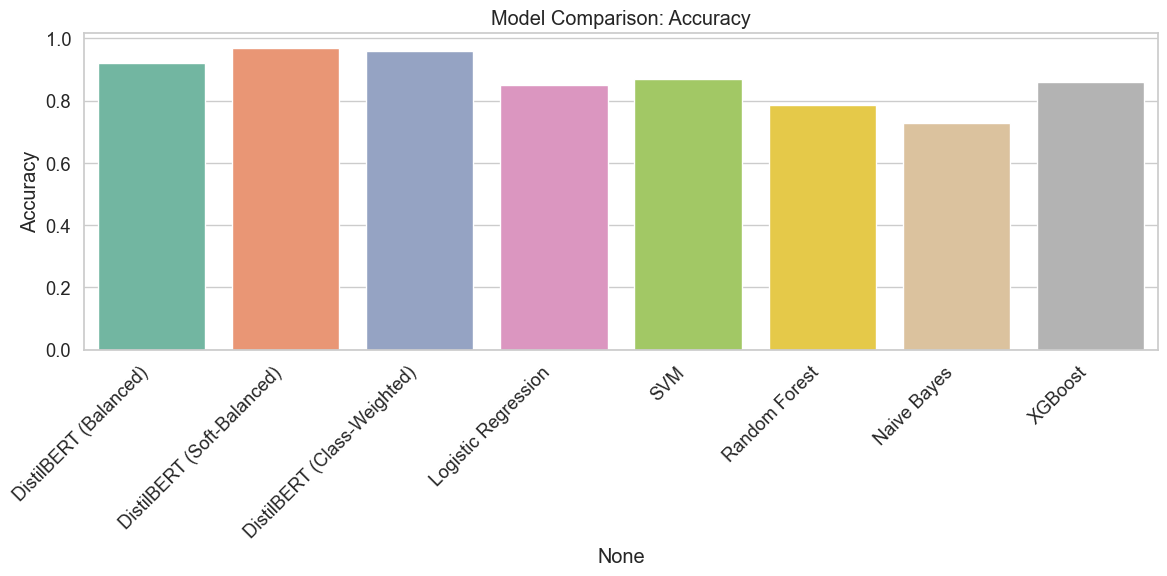

C:\Users\akifk\AppData\Local\Temp\ipykernel_8860\3361756190.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_results.index, y=df_results['macro_f1'], palette=palette)


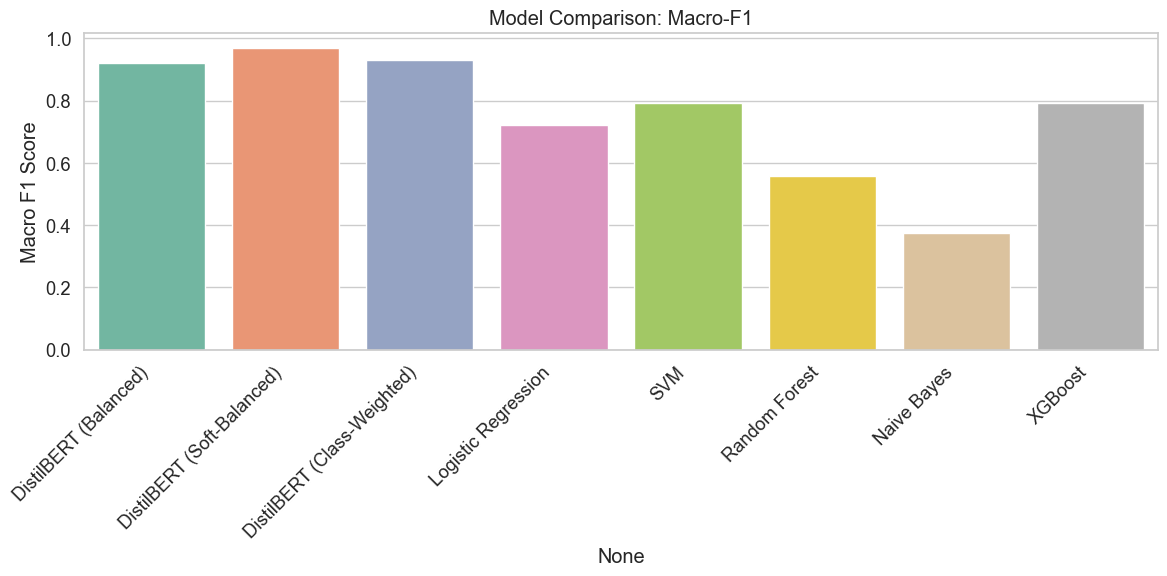

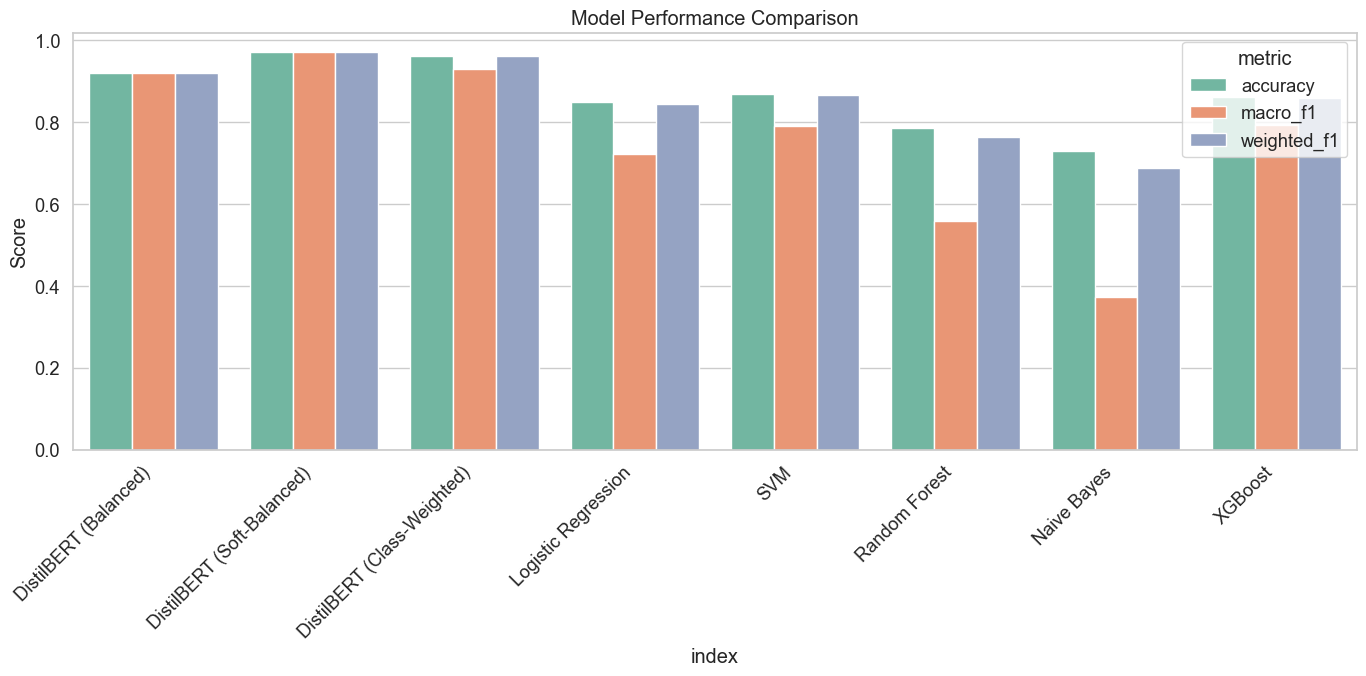

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid", font_scale=1.2)

palette = sns.color_palette("Set2", n_colors=len(df_results))

# Accuracy
plt.figure(figsize=(12,6))
sns.barplot(x=df_results.index, y=df_results['accuracy'], palette=palette)
plt.ylabel("Accuracy")
plt.title("Model Comparison: Accuracy")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Macro-F1
plt.figure(figsize=(12,6))
sns.barplot(x=df_results.index, y=df_results['macro_f1'], palette=palette)
plt.ylabel("Macro F1 Score")
plt.title("Model Comparison: Macro-F1")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Combined
plt.figure(figsize=(14,7))
df_melt = df_results.reset_index().melt(id_vars="index", var_name="metric", value_name="score")
sns.barplot(data=df_melt, x="index", y="score", hue="metric", palette="Set2")
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid", font_scale=1.2)

# Sort helper
df_sorted_acc = df_results.sort_values("accuracy", ascending=False)
df_sorted_f1 = df_results.sort_values("macro_f1", ascending=False)


C:\Users\akifk\AppData\Local\Temp\ipykernel_8860\3681365510.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


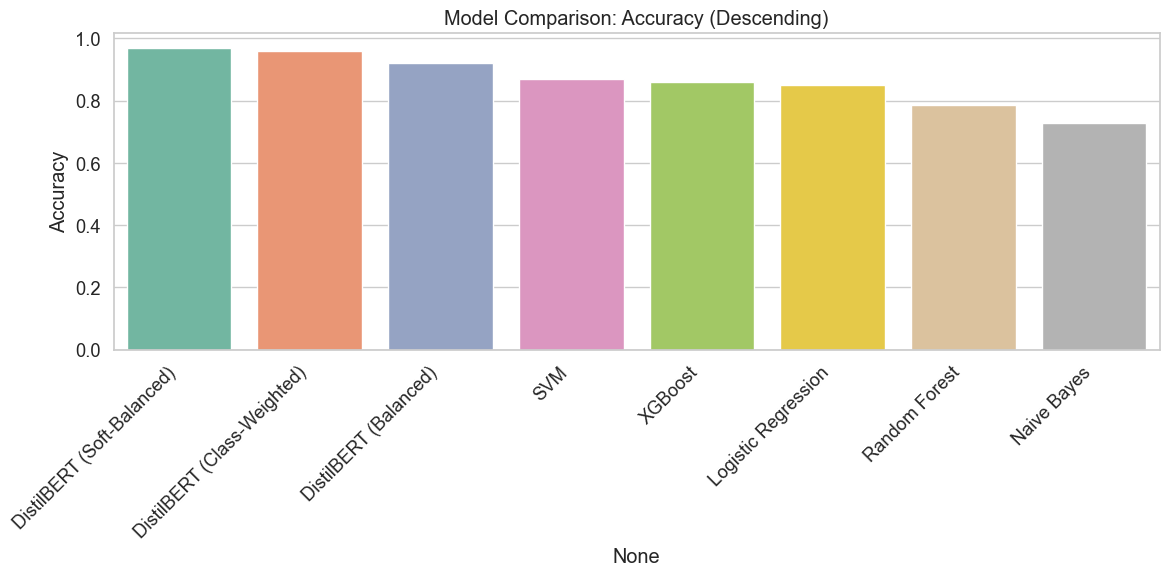

In [26]:
plt.figure(figsize=(12,6))
sns.barplot(
    x=df_sorted_acc.index,
    y=df_sorted_acc['accuracy'],
    palette="Set2"
)
plt.ylabel("Accuracy")
plt.title("Model Comparison: Accuracy (Descending)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


C:\Users\akifk\AppData\Local\Temp\ipykernel_8860\2023842322.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


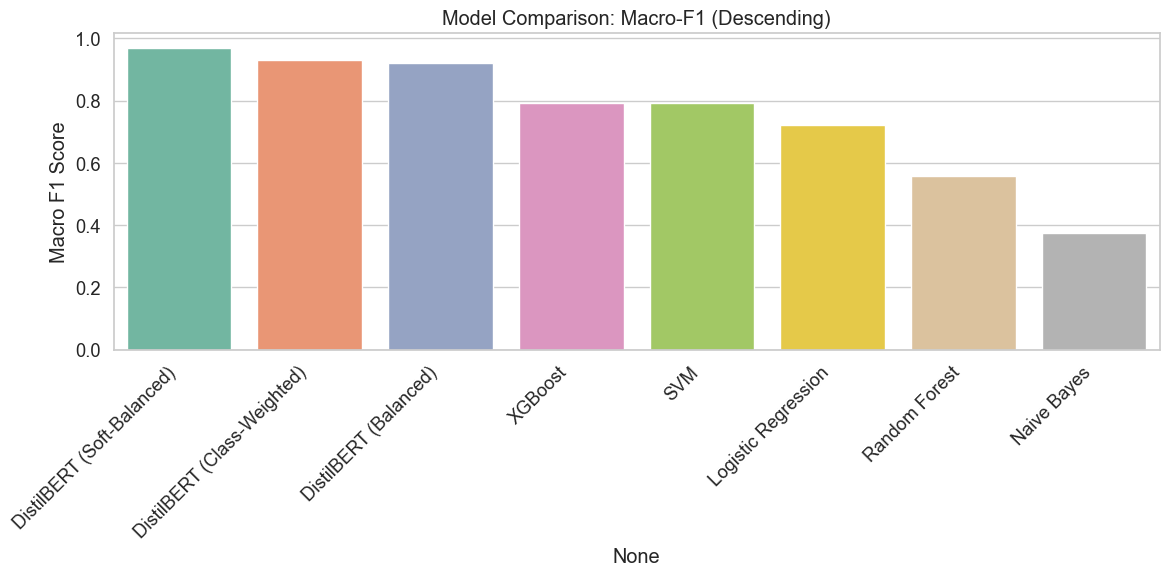

In [23]:
plt.figure(figsize=(12,6))
sns.barplot(
    x=df_sorted_f1.index,
    y=df_sorted_f1['macro_f1'],
    palette="Set2"
)
plt.ylabel("Macro F1 Score")
plt.title("Model Comparison: Macro-F1 (Descending)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


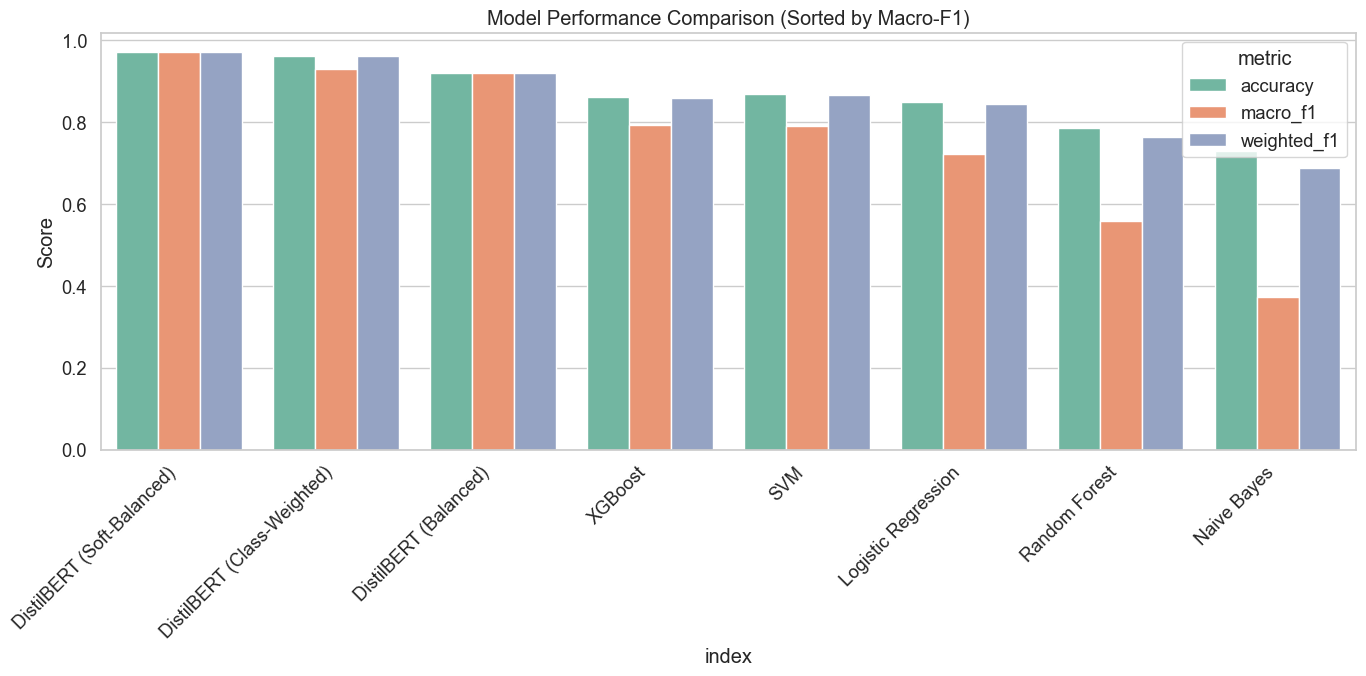

In [24]:
df_melt = df_results.reset_index().melt(
    id_vars="index",
    var_name="metric",
    value_name="score"
)

# Sort labels based on macro_f1 order
order = df_sorted_f1.index.tolist()

plt.figure(figsize=(14,7))
sns.barplot(
    data=df_melt,
    x="index",
    y="score",
    hue="metric",
    palette="Set2",
    order=order
)
plt.ylabel("Score")
plt.title("Model Performance Comparison (Sorted by Macro-F1)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
